# 目標

## 機械学習の基礎を理解して、独自で基本的な学習モデルのコードを実装できるようになる。

# 学習内容

## - AIとは何か
## - 機械学習の基本原理とは
## - 機械学習を構成する要素
## - 機械学習モデルとは
## - TensorFlowとPythonによるautoencoderの実装
## - 画像分類技術の基礎
## - TensorFlowとPythonによる画像分類の実装
## - スパムメール分類
## - 強化学習の基礎
## - 迷路探索アルゴリズムの実装(各自)
## - 生成AIの使い方（プロンプト）

In [ ]:
%matplotlib inline

"""Train My Autoencoder Model"""

from __future__ import print_function
from numpy import random
import numpy as np
from matplotlib.lines import Line2D  

random.seed(42)  # @UndefinedVariable

from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50

"""Autoencoder Simples Model
https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
参考論文 : https://arxiv.org/pdf/1812.11262.pdf
[我々はロバストな予測のためのオートエンコーダーベースの残差ディープネットワークを提案する]
"""
    
    # load mnist data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, [-1, x_train.shape[1] * x_train.shape[2]])
x_test  = np.reshape(x_test, [-1, x_test.shape[1] * x_test.shape[2]])

# encode
encoding_dim = 32
input_img    = Input(shape=(x_train.shape[1], ), name = "autoencoder" + "_input")
encoded      = Dense(encoding_dim, activation='relu')(input_img)
encoded      = Flatten(name='flatten_e1')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e2')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e3')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
# decode
decoded      = Dense(784, activation='sigmoid')(encoded)
decoded      = Flatten(name='flatten_d1')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d2')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d3')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
    
autoencoder  = Model(input_img, decoded)

# Opt
opt = Adam(lr=1e-4)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') <- NG
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
    
hist = autoencoder.fit(x_train, x_train, epochs=80, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    #plt.savefig("autoencoder_results.png")
    plt.show()

results_draw(x_test, decoded_imgs)


In [ ]:
import numpy as np

print(np.__version__)

In [ ]:
self.decorder = tf.keras.Sequential([layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'), 
                                     layers.Reshape(shape)], name = "decoder")

In [ ]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt
import numpy as np
 
# 絶対値の範囲が 有限なもの
activations_type0 = [
    "sigmoid",
    "tanh",
    "hard_sigmoid",
    "softsign",
]

# 絶対値の範囲に上限がないもの
activations_type1 = [
    "elu",
    "selu",
    "softplus",
    "relu",
    "linear",
]

x = np.linspace(-5, 5, 101).reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
for i, activations in enumerate([activations_type0, activations_type1]) :
    ax = fig.add_subplot(2, 1, i + 1)
    for activation_str in activations:
        model = Sequential()
        model.add(Activation(activation_str, input_shape=(1,)))
        y = model.predict(x).ravel()
        ax.plot(x, y, label=activation_str)
    ax.legend()

plt.show()

## 再急降下法

多くの場合、学習の問題は、与えられた評価関数を最適とするようなパラメータを求める問題として定式
化されます。従って、学習のためには、その最適化問題を解くための手法が必要になります。最適化手法に
は、簡単なものから高速性や安定性のために工夫した複雑手法まで、多くの手法がありますが、ここでは、
最も簡単な最適化手法のひとつである最急降下法と呼ばれる最適化手法の基本的な考え方について理解し
そのプログラムを作ってみることにします

### 問題
あるパラメータa の良さの評価尺度が以下のような２次の関数  

 $$ f(a) = (a - 1.0) ^ 2 $$

 で与えられたとします。このとき、この評価関数が最小となるパラメータ a の(最適解) を求めなさい。  

 $$ 微分 :     \frac{\partial f}{\partial a} = 2(a - 1.0) $$

### 再急降下法
最急降下法 最急降下法は、ある適当な初期値(初期パラメータ) からはじめて、その値を繰り返し更新する
(修正する) ことにより、最適なパラメータの値を求める方法(繰り返し最適化手法) の最も基本的で
単な方法です。

$$ 更新式 :  \alpha^{(k + 1)} = \alpha^{(k)} - 2\alpha(a - 1.0) $$

In [ ]:
%matplotlib inline
import sympy as sy
from IPython.display import display, Math

# SymPy Plotting Backends (SPB)
#from spb import plot, plot_implicit
from spb import plot

# グラフを SVG で Notebook にインライン表示
# これは試し
%config InlineBackend.figure_formats = ['svg']

# おまじない
sy.init_printing()

# π，ネイピア数，虚数単位
from sympy import pi, E, I


a = sy.symbols('a')

func = lambda x: (x -1.0) ** 2
display(Math(r" func = %s" % sy.latex(func(a))))

dfunc = sy.diff(func(a), a)
display(Math(r" \frac{d}{da} func = %s" % sy.latex(dfunc)))

print("value = {}".format(sy.solve(dfunc)))

plot(func(a), (a, -2, 4), line_color='r')

def main() :
    
    import numpy as np

    alpha = 0.1
    rng = np.random.default_rng()
    _a = 100 * (rng.random() - 0.5)
    
    for _ in range(100) :
        _a = _a - alpha * dfunc.subs(a, _a)
        
    return _a


print(" result = ", main())

x_train.shape =  (60000, 28, 28)
x_test.shape  =  (10000, 28, 28)
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Flatten)         (None, 784)               0         
                                                                 
 encoder_2 (Dense)           (None, 64)                50240     
                                                                 
 decoder_1 (Dense)           (None, 784)               50960     
                                                                 
 decoder_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
 10/469 [..............................] - ETA: 2s - loss: 0.1530  

2025-04-25 14:44:37.449853: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


469/469 [==============================] - 4s 7ms/step - loss: 0.0437 - val_loss: 0.0268
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0221 - val_loss: 0.0186
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0168 - val_loss: 0.0154
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
decoded_imgs.shape =  (10000, 28, 28)


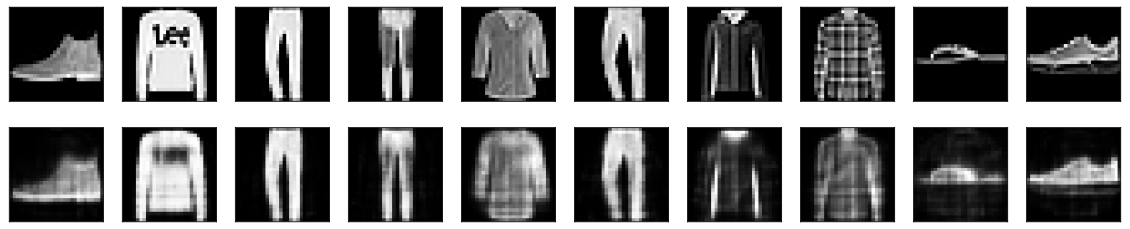

In [26]:
%matplotlib inline
"""autoencoderを実装する"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import fashion_mnist

# 学習データを用意する
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

print("x_train.shape = ", x_train.shape)
print("x_test.shape  = ", x_test.shape)

# 潜在空間の次元数
latent_dim   = 64
# targetの次元数
target_shape = x_train.shape[1:]

# batch size, epoch
batch_size = 128
epochs     = 10

# modelの定義
model = Sequential(name = "autoencoder")
encoder_1 = Flatten(input_shape = target_shape, name = "encoder_1")
encoder_2 = Dense(latent_dim, activation = 'relu', name = "encoder_2")
model.add(encoder_1)
model.add(encoder_2)
decorder_1 = Dense(tf.math.reduce_prod(target_shape), activation = 'sigmoid', name = "decoder_1")
decorder_2 = Reshape(target_shape, name = "decoder_2")
model.add(decorder_1)
model.add(decorder_2)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.MeanSquaredError())

model.summary()

# 学習
history = model.fit(x_train, x_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, x_test))

# 結果を評価する
decoded_imgs = model.predict(x_test)
print("decoded_imgs.shape = ", decoded_imgs.shape)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

results_draw(x_test, decoded_imgs)